In [11]:
%matplotlib inline
import numpy as np
from load_ply import load_ply
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [12]:
def voxilize(np_pc):

    max_dist = 0.0
    for it in range(0,3):
        # 最大値と最小値の距離を求める
        min = np.amin(np_pc[:,it])
        max = np.amax(np_pc[:,it])
        dist = max-min

        #xyzで一番並行距離が大きいのを求める
        if dist > max_dist:
            max_dist = dist
            
    for it in range(0,3):

        # 最大値と最小値の距離を求める
        min = np.amin(np_pc[:,it])
        max = np.amax(np_pc[:,it])
        dist = max-min
        
        #中心座標を 0,0,0にセットする（原点が中心にくるようにする）
        np_pc[:,it] = np_pc[:,it] - dist/2 - min

        #covered cells
        cls = 29

        #ボクセル一個当たりのサイズを求める
        vox_sz = max_dist/(cls-1)

        #上で算出した値で各点を割る。これで各点は(-14, 14)の範囲の値になる
        np_pc[:,it] = np_pc[:,it]/vox_sz

        #各点が全て正の整数になるよう移動。これで各点は[0, 30]になる（多分）
        np_pc[:,it] = np_pc[:,it] + (cls-1)/2


    #整数にする
    np_pc = np.rint(np_pc).astype(np.uint32)


    #３０＊３０＊３０の配列を作り，点が存在する場合は1、存在しない場合は0を入力する。
    vox = np.zeros([30,30,30])

    # (pc_x, pc_y, pc_z)にnp_pcの座標を代入する
    for (pc_x, pc_y, pc_z) in np_pc:

    # 点が存在しても20%の確率で0とし、データにノイズを加え、汎用性を上げている
    # ここ，ノイジーなデータの場合８０よりも小さい数字にしたほうがいいかもね？
        if random.randint(0,100) < 80:
            vox[pc_x, pc_y, pc_z] = 1

    np_vox = np.zeros([1,1,32,32,32])
    np_vox[0, 0, 1:-1, 1:-1, 1:-1] = vox

    return np_vox

In [13]:
def voxel_scatter(np_vox):

    #空の配列を作る
    vox_scat = np.zeros([0,3], dtype= np.uint32)

    #32回
    for x in range(0,np_vox.shape[2]):
        #32回
        for y in range(0,np_vox.shape[3]):
            #32回
            for z in range(0,np_vox.shape[4]):
                #（ｘ，ｙ，ｚ）に１が入っていればその座標を返す
                if np_vox[0,0,x,y,z] == 1.0:
                    arr_tmp = np.zeros([1,3],dtype=np.uint32)
                    arr_tmp[0,:] = (x,y,z)
                    vox_scat = np.concatenate((vox_scat,arr_tmp))
    return vox_scat

In [50]:
def plot_trihedral_figure(np_pc):
    #三面図
    a = 1
    for i in range(3):
        if i == 2:
            a = -2
        plt.scatter(np_pc[:,i],np_pc[:,i+a],s=10)
        plt.xlim([-2,32]) 
        plt.ylim([-2,32]) 
        plt.gca().set_aspect('equal')
        plt.show()

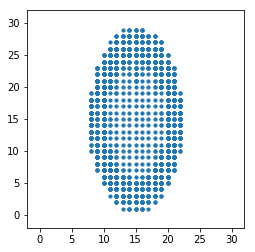

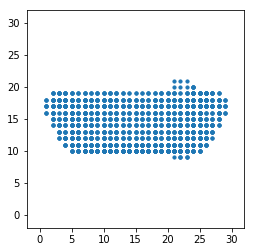

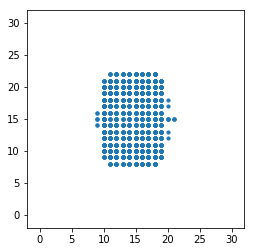

In [51]:
a = load_ply("bathtub_0107.ply")
a = voxilize(a)
a = voxel_scatter(a)
plot_trihedral_figure(a)